# The Submission Notebook for Computer Infracture Module

## Problem 1: Data from yfinance



Prior starting off this project, I created a python virtual environment where I install python packages specific for science in data analytics program. This helps me to keep the python packages of different projects separately and do not mix them, in case, different projects have specific version requirements for certain packages. Also, this does not overload the system.

In [114]:
# Install the yfinace, matplotlib package, if not yet installed
# !pip install yfinance
# !pip install matplotlib

In [115]:
import yfinance as yf # Downlaoding stock price data
from datetime import datetime # Extracting time information from the OS
import pandas as pd # Working with dataframes

from matplotlib import pyplot as plt


In [116]:
# Save the current_time outside the function because you will need it multiple times
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

def get_data(current_time):
    # Explains on how to set parameters for the download function: https://ranaroussi.github.io/yfinance/reference/api/yfinance.Tickers.html#yfinance.Tickers
    # Dowload the faang data for the last five days in one hour intervals
    faang_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')


    # Explains how to get the current time: https://sentry.io/answers/get-the-current-time-in-python/
    # Explains on how to convert the datetime object to a string: https://stackoverflow.com/questions/415511/how-do-i-get-the-current-time-in-python
    # Get the current date and time, then, convert it to a string to use it in naming the csv file
    

    # Define the name of the file to use for saving the df into a csv file in the data folder
    file_name = f"data/{current_time}.csv"

    # Explains how to save pandas df: https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/
    # Save the faang data as the csv file in the data folder
    faang_data.to_csv(file_name)


In [117]:
get_data(current_time)

/tmp/ipykernel_23854/1680669783.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  faang_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

In [122]:
# Get the name of the file in the data file
file  = !ls data/

# Examples on how to load csv file as pandas df while preserving heading and row levels
# Load  the first csv file in the data folder and print the head
df = pd.read_csv(f"data/{file[0]}", header=[0, 1], index_col=0)

Here I have to understand how to access the data from pandas df that I need to plot my plot. Here I need to plot the stock close price of the faang stocs in the past five days with one hour intervals. The best plot to represent this type of data is the line plot where I can plot all the data for all five stocks on one plot.

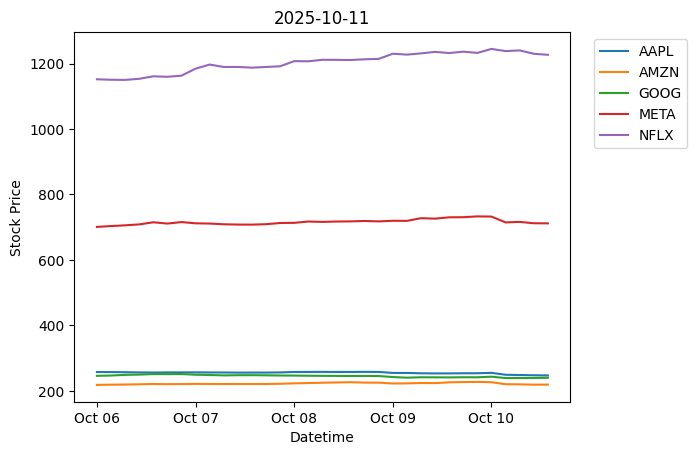

<Figure size 640x480 with 0 Axes>

In [119]:
# Explains the structure of the panda.Series so that I could access the data from the finance data 
# that I recently uploaded:https://pandas.pydata.org/docs/reference/api/pandas.Series.index.html#pandas.Series.index.

# Explains on how to plot multiple lines on the same plot using pyplot: 
# https://www.geeksforgeeks.org/python/plot-multiple-lines-in-matplotlib/.

# Plot the plots of the FAANG stocks
for ticker in ["AAPL", "AMZN", "GOOG", "META", "NFLX"]:
    plt.plot(df.index, df["Close"][ticker], label=ticker)

# Get the current date to use it as the title for the following plot
date = datetime.now().strftime("%Y-%m-%d")


date_ticks = []
xtick_location = []

# Add the date in the format ("%b %d") to date_ticks and mark the location in the 
# list of it in the xtick_location so you use both lists to set xticks on the plot.
for i in range(0, len(df.index)): # Iterate through all dates in the df.index to generate x axis ticks at the start of each day

    # Explains on how to use strptime to convert a date in a string format to the datetime object so that later you could access
    # different types of date formats: https://docs.python.org/3/library/datetime.html#datetime.datetime.strftime
    # Convert each date in a string format to a datetime object 
    when = datetime.strptime(df.index[i], "%Y-%m-%d %H:%M:%S%z")
    # Access the month and day info from the when variable in a 
    month_day = when.strftime("%b %d") # %b - the first three month letters, %d - the day of the month represented as two digits
    # Add the date in the format "%b %d" if it is unique value in the date_ticks variable
    # Also, add the location from the df.index object of this first unique variable to the xtick_location variable
    if month_day not in date_ticks:
        date_ticks.append(month_day)
        xtick_location.append(i)


plt.legend()
plt.title(f"{date}")
plt.xlabel("Datetime")
# Explains on how to change xtick arrangement: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(xtick_location, date_ticks) # The x ticks are divided by date and the tick indicates the first value of the day
plt.ylabel("Stock Price")
plt.legend(bbox_to_anchor=(1.25, 1)) # Set the legend cordinates outside the plot for better presentation
plt.show()
# Explains how to save pyplot figures: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# Save the plot in the plots folder
plt.savefig(f"plots/{current_time}.png")

In [120]:
def plot_data(current_time):
    # Explains the structure of the panda.Series so that I could access the data from the finance data 
    # that I recently uploaded:https://pandas.pydata.org/docs/reference/api/pandas.Series.index.html#pandas.Series.index.

    # Explains on how to plot multiple lines on the same plot using pyplot: 
    # https://www.geeksforgeeks.org/python/plot-multiple-lines-in-matplotlib/.

    # Plot the plots of the FAANG stocks
    for ticker in ["AAPL", "AMZN", "GOOG", "META", "NFLX"]:
        plt.plot(df.index, df["Close"][ticker], label=ticker)

    # Get the current date to use it as the title for the following plot
    date = datetime.now().strftime("%Y-%m-%d")


    date_ticks = []
    xtick_location = []

    # Add the date in the format ("%b %d") to date_ticks and mark the location in the 
    # list of it in the xtick_location so you use both lists to set xticks on the plot.
    for i in range(0, len(df.index)): # Iterate through all dates in the df.index to generate x axis ticks at the start of each day

        # Explains on how to use strptime to convert a date in a string format to the datetime object so that later you could access
        # different types of date formats: https://docs.python.org/3/library/datetime.html#datetime.datetime.strftime
        # Convert each date in a string format to a datetime object 
        when = datetime.strptime(df.index[i], "%Y-%m-%d %H:%M:%S%z")
        # Access the month and day info from the when variable in a 
        month_day = when.strftime("%b %d") # %b - the first three month letters, %d - the day of the month represented as two digits
        # Add the date in the format "%b %d" if it is unique value in the date_ticks variable
        # Also, add the location from the df.index object of this first unique variable to the xtick_location variable
        if month_day not in date_ticks:
            date_ticks.append(month_day)
            xtick_location.append(i)


    plt.legend()
    plt.title(f"{date}")
    plt.xlabel("Datetime")
    # Explains on how to change xtick arrangement: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    plt.xticks(xtick_location, date_ticks) # The x ticks are divided by date and the tick indicates the first value of the day
    plt.ylabel("Stock Price")
    plt.legend(bbox_to_anchor=(1.25, 1)) # Set the legend cordinates outside the plot for better presentation
    # Explains how to save pyplot figures: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    # Save the plot in the plots folder
    plt.savefig(f"plots/{current_time}.png")

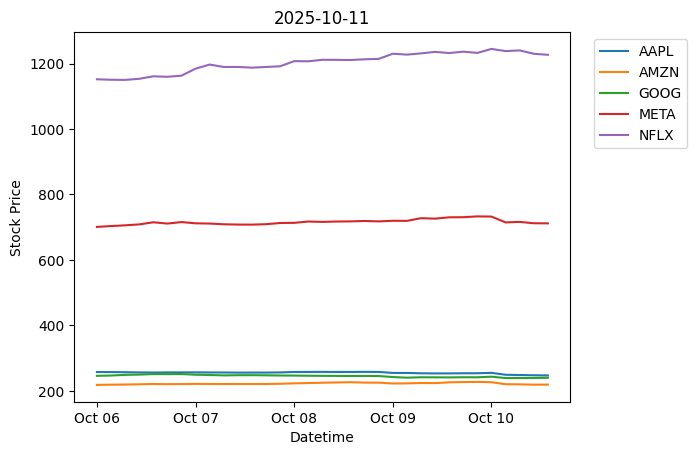

In [121]:
plot_data(current_time)

## Problem 3: Script